## Aufgabe 2

In [198]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random

In [199]:
N = 2

In [200]:
def init_transformation_matrix(N):
    C = np.zeros(shape=(N,N))
    for i in range(N):
        for j in range(N):
            if i == 0:
                cn = np.sqrt(1/N)
            else:
                cn = np.sqrt(2/N)
            C[i][j] = cn * np.cos((2*j+1)*i*np.pi/(2*N))
    return C

In [201]:
C_2 = init_transformation_matrix(2)
C_4 = init_transformation_matrix(4)
C_8 = init_transformation_matrix(8)
C_16 = init_transformation_matrix(16)
print(C)

[[ 0.5         0.5         0.5         0.5       ]
 [ 0.65328148  0.27059805 -0.27059805 -0.65328148]
 [ 0.5        -0.5        -0.5         0.5       ]
 [ 0.27059805 -0.65328148  0.65328148 -0.27059805]]


In [202]:
print(np.max(abs(LA.inv(C_2) - C_2.T)))

2.220446049250313e-16


In [203]:
print(np.max(abs(LA.inv(C_4) - C_4.T)))

3.3306690738754696e-16


In [204]:
print(np.max(abs(LA.inv(C_8) - C_8.T)))

4.440892098500626e-16


In [205]:
print(np.max(abs(LA.inv(C_16) - C_16.T)))

1.7486012637846216e-15


##### This proves that C inverted is equal to C transported. Because if we change Ci = Ct to Ci - Ct = 0, then we have the above result. And if this is true, the difference should be zero. It isn't because python is doing numerical errors (rounding)

## Aufgabe 3

$\mathbf{y}$ / $\mathbf{C}$ = $\mathbf{x}$

 # Fuktionen fuer DCT

In [206]:
def CMatrix(N):
    C = np.zeros(shape=(N,N))
    for n in range(N):
        for k in range(N):
            if n == 0:
                c_n = np.sqrt(1/N)
            else:
                c_n = np.sqrt(2/N)
            C[n][k] = c_n * np.cos((2*k+1)*n*np.pi/(2*N))
    return C
    
C = CMatrix(N=4)

In [207]:
def dct2d(X):
    CL = CMatrix(X.shape[0]) # m
    CR = CMatrix(X.shape[1]) # n
    Y = np.dot(np.dot(CL, X), CR.T)
    return Y

def idct2d(Y):
    CL = CMatrix(Y.shape[0]) # m
    CR = CMatrix(Y.shape[1]) # n
    X = np.dot(np.dot(CL.T, Y), CR)
    return X
    
def compress(Y, thresh):
    Y[abs(Y) < thresh] = 0
    return Y

## Aufgabe 4

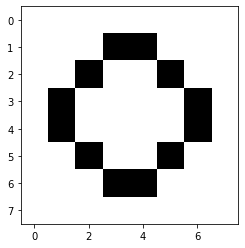

In [208]:
N = 8
# create image 
array = np.zeros([N, N], dtype=np.uint8)
# every pixel is white
array[:][:] = 255
# set pixel in shape of circle to black
array[1][3] = 0
array[1][4] = 0
array[2][2] = 0
array[2][5] = 0
array[3][1] = 0
array[3][6] = 0
array[4][1] = 0
array[4][6] = 0
array[5][2] = 0
array[5][5] = 0
array[6][3] = 0
array[6][4] = 0
plt.imshow(array, cmap='gray')

In [209]:
# compress the image with the given compressing rates
def compress_imgs(img, rates):
    index = 0
    images = {}
    for rate in rates:
        image_compressed = dct2d(img)
        image_compressed = compress(image_compressed, rate)
        image_compressed =  idct2d(image_compressed)
        images[index] = image_compressed
        index = index + 1
    return images

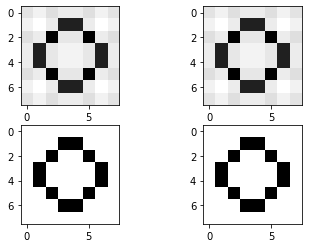

In [210]:
rates = [90,70,50,30]
compressed_images = compress_imgs(array, rates)
plt.subplot(221)
plt.imshow(compressed_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(compressed_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(compressed_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(compressed_images[3], cmap='gray')

## Aufgabe 5

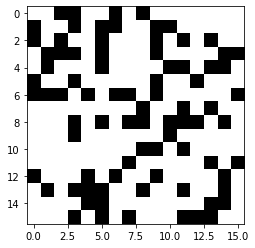

In [215]:
N = 16
# create image 
array = np.zeros([N, N], dtype=np.uint8)
# every pixel is white
array[:][:] = 255
# generate random shapes
for i in range(100):
    array[random.randint(0,15)][random.randint(0,15)] = 0
plt.imshow(array, cmap='gray')

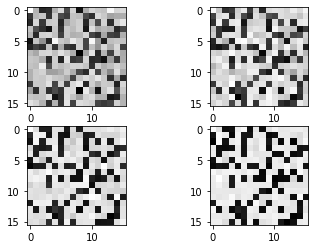

In [216]:
rates = [90,70,50,30]
compressed_images = compress_imgs(array, rates)
plt.subplot(221)
plt.imshow(compressed_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(compressed_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(compressed_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(compressed_images[3], cmap='gray')